<a href="https://colab.research.google.com/github/anggitafz/Postest-1-Data-Mining/blob/main/015_Anggita_Fazrina_Posttest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

Impor data kedalam dataframe

In [1]:
import pandas as pd
df = pd.read_excel('tabulasi.xlsx')
df

,Whole Milk,Pastry,Salty Snack,Sausage,Semi-Finished Bread,Yogurt,Soda,pickled vegetables,canned beer,misc beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Menghitung total dari item pada dataframe
df.sum()

Whole Milk             5
Pastry                 1
Salty Snack            1
Sausage                4
Semi-Finished Bread    1
Yogurt                 1
Soda                   3
pickled vegetables     1
canned beer            1
misc beverages         1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [3]:
# Menampilkan kolom pada dataframe
df.columns

Index(['Whole Milk', 'Pastry', 'Salty Snack ', 'Sausage',
       'Semi-Finished Bread', 'Yogurt', 'Soda', 'pickled vegetables',
       'canned beer', 'misc beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread',
       'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit',
       'sugar', 'butter milk', 'specialty chocolate', 'frozen meals',
       'dental care', 'root vegetables', 'detergent', 'dish cleaner',
       'cling film/bags'],
      dtype='object')

In [4]:
# Menentukan kombinasi barang yang mungkin terjadi
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack '),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'Semi-Finished Bread'),
 ('Whole Milk', 'Yogurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'pickled vegetables'),
 ('Whole Milk', 'canned beer'),
 ('Whole Milk', 'misc beverages'),
 ('Whole Milk', 'hygiene articles'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'frankfurter'),
 ('Whole Milk', 'whipped/sour cream'),
 ('Whole Milk', 'curd'),
 ('Whole Milk', 'beef'),
 ('Whole Milk', 'white bread'),
 ('Whole Milk', 'butter'),
 ('Whole Milk', 'frozen vegetables'),
 ('Whole Milk', 'other vegetables'),
 ('Whole Milk', 'tropical fruit'),
 ('Whole Milk', 'sugar'),
 ('Whole Milk', 'butter milk'),
 ('Whole Milk', 'specialty chocolate'),
 ('Whole Milk', 'frozen meals'),
 ('Whole Milk', 'dental care'),
 ('Whole Milk', 'root vegetables'),
 ('Whole Milk', 'detergent'),
 ('Whole Milk', 'dish cleaner'),
 ('Whole Milk', 'cling film/bags'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack '),
 (

In [5]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack '),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'Semi-Finished Bread'),
 ('Whole Milk', 'Yogurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'butter'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack '),
 ('Salty Snack ', 'Whole Milk'),
 ('Salty Snack ', 'Pastry'),
 ('Sausage', 'Whole Milk'),
 ('Sausage', 'Semi-Finished Bread'),
 ('Sausage', 'Yogurt'),
 ('Sausage', 'hygiene articles'),
 ('Sausage', 'rolls/buns'),
 ('Semi-Finished Bread', 'Whole Milk'),
 ('Semi-Finished Bread', 'Sausage'),
 ('Semi-Finished Bread', 'Yogurt'),
 ('Yogurt', 'Whole Milk'),
 ('Yogurt', 'Sausage'),
 ('Yogurt', 'Semi-Finished Bread'),
 ('Soda', 'Whole Milk'),
 ('Soda', 'pickled vegetables'),
 ('Soda', 'frankfurter'),
 ('Soda', 'whipped/sour cream'),
 ('pickled vegetables', 'Soda'),
 ('canned beer', 'misc beverages'),
 ('misc beverages', 'canned beer'),
 ('hygiene articles', 'Sausage'),
 ('rolls/buns', 'Whole Milk'),
 ('rol

In [6]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('Whole Milk', 'Pastry')": 1,
 "('Whole Milk', 'Salty Snack ')": 1,
 "('Whole Milk', 'Sausage')": 2,
 "('Whole Milk', 'Semi-Finished Bread')": 1,
 "('Whole Milk', 'Yogurt')": 1,
 "('Whole Milk', 'Soda')": 1,
 "('Whole Milk', 'rolls/buns')": 1,
 "('Whole Milk', 'butter')": 1,
 "('Pastry', 'Whole Milk')": 1,
 "('Pastry', 'Salty Snack ')": 1,
 "('Salty Snack ', 'Whole Milk')": 1,
 "('Salty Snack ', 'Pastry')": 1,
 "('Sausage', 'Whole Milk')": 2,
 "('Sausage', 'Semi-Finished Bread')": 1,
 "('Sausage', 'Yogurt')": 1,
 "('Sausage', 'hygiene articles')": 1,
 "('Sausage', 'rolls/buns')": 2,
 "('Semi-Finished Bread', 'Whole Milk')": 1,
 "('Semi-Finished Bread', 'Sausage')": 1,
 "('Semi-Finished Bread', 'Yogurt')": 1,
 "('Yogurt', 'Whole Milk')": 1,
 "('Yogurt', 'Sausage')": 1,
 "('Yogurt', 'Semi-Finished Bread')": 1,
 "('Soda', 'Whole Milk')": 1,
 "('Soda', 'pickled vegetables')": 1,
 "('Soda', 'frankfurter')": 1,
 "('Soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'Soda')": 1,
 "(

In [7]:
# Melihat banyak transaksi
len(df)

19

In [8]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('Whole Milk', 'Pastry') support = 5.263157894736842%
('Whole Milk', 'Salty Snack ') support = 5.263157894736842%
('Whole Milk', 'Sausage') support = 10.526315789473683%
('Whole Milk', 'Semi-Finished Bread') support = 5.263157894736842%
('Whole Milk', 'Yogurt') support = 5.263157894736842%
('Whole Milk', 'Soda') support = 5.263157894736842%
('Whole Milk', 'rolls/buns') support = 5.263157894736842%
('Whole Milk', 'butter') support = 5.263157894736842%
('Pastry', 'Whole Milk') support = 5.263157894736842%
('Pastry', 'Salty Snack ') support = 5.263157894736842%
('Salty Snack ', 'Whole Milk') support = 5.263157894736842%
('Salty Snack ', 'Pastry') support = 5.263157894736842%
('Sausage', 'Whole Milk') support = 10.526315789473683%
('Sausage', 'Semi-Finished Bread') support = 5.263157894736842%
('Sausage', 'Yogurt') support = 5.263157894736842%
('Sausage', 'hygiene articles') support = 5.263157894736842%
('Sausage', 'rolls/buns') support = 10.526315789473683%
('Semi-Finished Bread', 'Wh

In [9]:
df["Soda"].sum()

3

In [10]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
Whole Milk->Pastry  Confidence = 20.0%
Whole Milk->Salty Snack   Confidence = 20.0%
Whole Milk->Sausage  Confidence = 40.0%
Whole Milk->Semi-Finished Bread  Confidence = 20.0%
Whole Milk->Yogurt  Confidence = 20.0%
Whole Milk->Soda  Confidence = 20.0%
Whole Milk->rolls/buns  Confidence = 20.0%
Whole Milk->butter  Confidence = 20.0%
Pastry->Whole Milk  Confidence = 100.0%
Pastry->Salty Snack   Confidence = 100.0%
Salty Snack ->Whole Milk  Confidence = 100.0%
Salty Snack ->Pastry  Confidence = 100.0%
Sausage->Whole Milk  Confidence = 50.0%
Sausage->Semi-Finished Bread  Confidence = 25.0%
Sausage->Yogurt  Confidence = 25.0%
Sausage->hygiene articles  Confidence = 25.0%
Sausage->rolls/buns  Confidence = 50.0%
Semi-Finished Bread->Whole Milk  Confidence = 100.0%
Semi-Finished Bread->Sausage  Confidence = 100.0%
Semi-Finished Bread->Yogurt  Confidence = 100.0%
Yogurt->Whole Milk  Confidence = 100.0%
Yogurt->Sausage  Confidence = 100.0%
Yogurt->Semi-Finished Bread  Confidence = 100.0%
Sod

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

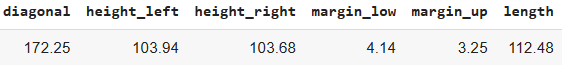
<!-- 1412 -->

In [11]:
# Mengimpor dataset kedalam dataframe
df2 = pd.read_excel('dataset.xlsx')

In [12]:
# Menampilkan datframe dalam tabel
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [13]:
# Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - new_data['diagonal'].values[0])**2
    + (df2['height_left'] - new_data['height_left'].values[0])**2
    + (df2['height_right'] - new_data['height_right'].values[0])**2
    + (df2['margin_low'] - new_data['margin_low'].values[0])**2
    + (df2['margin_up'] - new_data['margin_up'].values[0])**2
    + (df2['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])
     

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


In [14]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df2)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [15]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# Mengurutkan data dari kecil ke besar
sorted = df2.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df2)))

# Menentukan data terdekat
data_terdekat = sorted.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [16]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))
     

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Anggita Fazrina

> Nim : 2109116015


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

**Judul**

Bank Customer Churn Prediction


**Bussiness Understanding**

US Bank merupakan sebuah perusahaan bank di Amerika Serikat. US Bank adalah salah satu bank terbesar di Amerika Serikat dengan total aset sekitar $550 miliar dan telah memiliki 3000 cabang di dunia. untuk itu US Bank perlu melakukan prediksi *Churn* pada nasabah.

Churn merupakan istilah yang dapat digunakan untuk merujuk pada jumlah nasabah yang telah keluar dari bank atau tidak dalam jangka waktu tertentu.
Churn Bank dapat berdampak buruk pada bisnis perusahaan. oleh karena itu bank perlu memahami faktor - faktor yang mempengaruhi churn bank dan mengambil tindakan yang tepat sebagai solusi untuk mempertahankan nasabah yang ada dan menarik nasabah baru.

pada kasus ini tujuan penggunaan data mining adalah untuk memprediksi apakah nasabah bank akan tetap menjadi nasabah pada US Bank atau tidak.
Dengan melakukan predisi, bank dapat mengambil tindakan pencegahan dan mempertahankan pelanggan yang mungkin berpikir untuk keluar. Selain itu, data ini juga dapat membantu bank dalam memahami perilaku pelanggan dan faktor-faktor apa saja yang mempengaruhi keputusan pelanggan untuk keluar dari bank. Hal ini dapat membantu bank dalam membangun strategi pemasaran yang lebih baik dan meningkatkan kualitas layanan yang disediakan untuk pelanggan.

**Data Understanding**

Collect Initial Data

Data nasabah Bank US didapat dari website resmi kaggle pada link berikut :
https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction


In [1]:
# Import dataset ke dalam dataframe
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

Describe Data

Dataset ini berupa file csv yang memiliki 10000 baris dan 14 kolom.
Pada dataset ini terdapat 14 variabel
 

1.  RowNumber : Nomor kolom 
2.  CustomerId : Nomor unik untuk setiap nasabah
3.   Surname : Nama nasabah
4.   CreditScore : Skor kredit yang diberikan bank
5.   Geography : Lokasi geografis nasabah 
6.   Gender : Jenis kelamin
7.   Age : Umur nasabah
8.   Tenure : lamanya nasabah telah menjadi pelanggan
9.   Balance : jumlah uang yang tersimpan dalam rekening nasabah
10.   NumOfProducts : jumlah layanan yang dimiliki nasabah
11.  HasCrCard : apakah nasabah mempunyai kartu kredit atau tidak (1=Ya, 0=Tidak)
12.  IsActiveMember : apakah nasabah aktif atau tidak (1=Ya,0=Tidak)
13.  EstimatedSalary : perkiraan gaji nasabah dalam pertahun
14.  Exited : apakah nasabah keluar dari bank atau tidak (1=Ya, 0=Tidak).




In [2]:
# Menampilkan dataset nasabah bank
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Explore Data

Kolom akan divisualisasikan untuk dapat mengolah data lebih lanjut menggunakan scatterplot dan countplot.



<Axes: xlabel='Tenure', ylabel='count'>

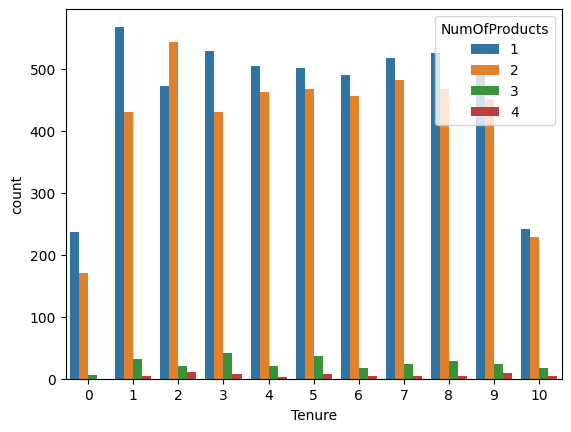

In [10]:
import seaborn as sns
sns.countplot(data=df,x="Tenure",hue="NumOfProducts")

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


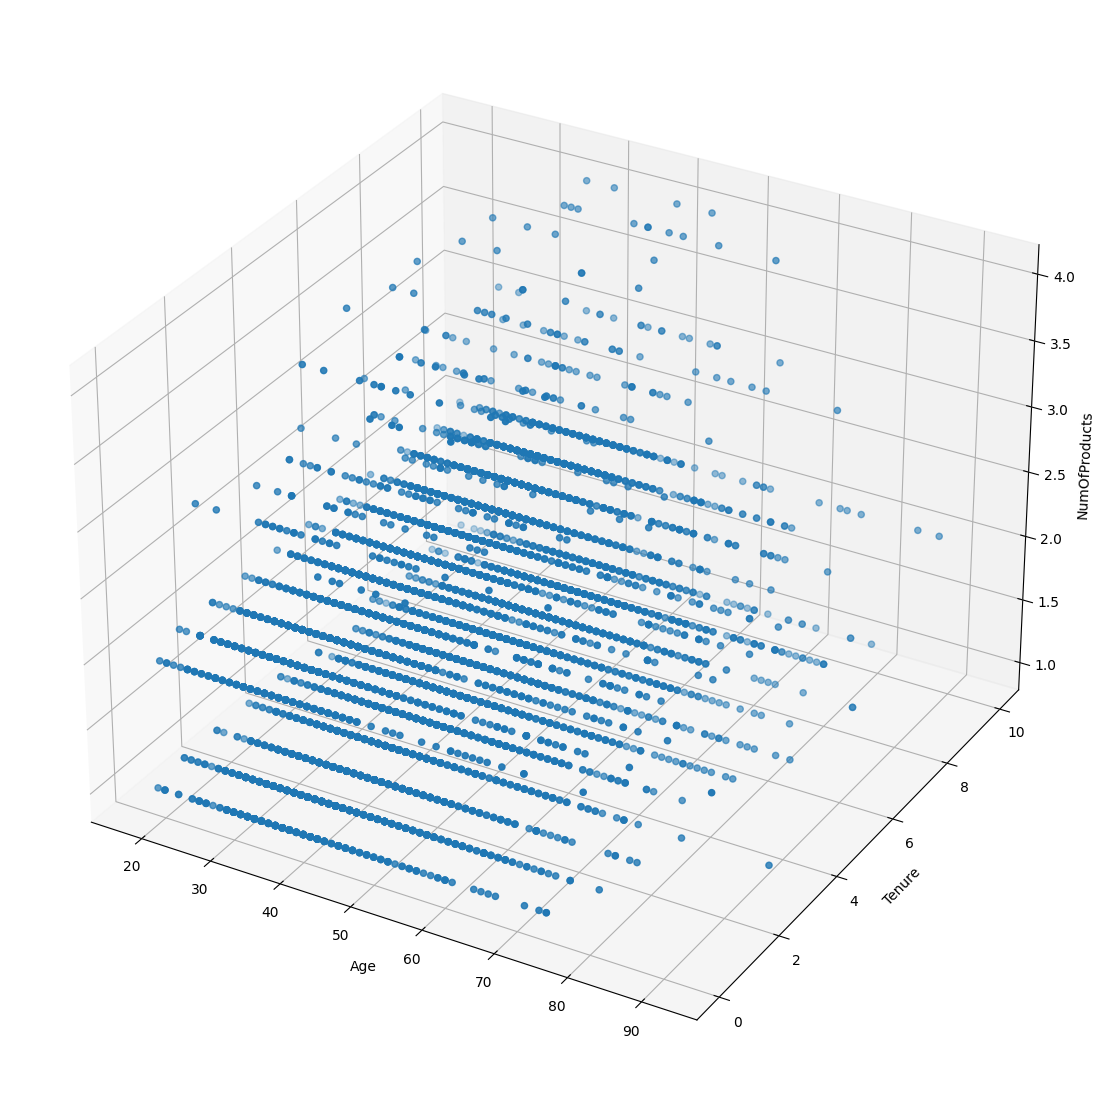

In [17]:
import matplotlib.pyplot as plot

plot.figure(figsize=(15,14))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(df['Age'],df['Tenure'],df['NumOfProducts'])

axes.set_xlabel('Age')
axes.set_ylabel('Tenure')
axes.set_zlabel('NumOfProducts')
plot.show()

Sumbu x merupakan kategori umur nasabah. Sedangkan sumbu y merupakan lamanya nasabah menjadi pelanggan. Dan sumbu z merupakan jumlah layanan yang dimiliki nasabah.

Verivy Data Quality

Verifikasi kualitas data berdasarkan dataset churn bank prediction terdiri dari beberapa indikator seperti 

*   kelengkapan data : dataset churn bank lengkap
*   Kesalahan data : semua variabel bernilai valid
*   Konsistensi data : semua nilai konsisten
*   Keseragaman data : semua variabel menggunakan format yang konsisten
*   Akurasi data : semua nilai akurat.








**Data Preparation**

Select Data

pada tahap select data menggunakan dataset yang berasal dari data nasabah Bank US.

In [19]:
df = pd.read_csv("Churn_Modelling.csv")

Clean Data

In [20]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Transform Data

In [22]:
df = pd.get_dummies(df)
print(df)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
0                 1          1               1        101348.88  ...   
1                 1          0         

Data Reduction

In [27]:
data = df.drop(columns=['Age','NumOfProducts'])
data

,RowNumber,CustomerId,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,2,0.00,1,1,101348.88,1,0,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,1,83807.86,0,1,112542.58,0,0,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,8,159660.80,1,0,113931.57,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,1,0.00,0,0,93826.63,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,2,125510.82,1,1,79084.10,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,5,0.00,1,0,96270.64,0,0,...,0,0,0,0,0,1,0,0,0,1
9996,9997,15569892,516,10,57369.61,1,1,101699.77,0,0,...,0,0,0,0,0,1,0,0,0,1
9997,9998,15584532,709,7,0.00,0,1,42085.58,1,0,...,0,0,0,0,0,1,0,0,1,0
9998,9999,15682355,772,3,75075.31,1,0,92888.52,1,0,...,0,0,0,0,0,0,1,0,0,1


Terdapat beberapa kolom dataset yang tidak diperlukan untuk mengurangi kompleksitas analisis yaitu kolom Age dan NumOfProducts. 

Slicing Data

In [29]:
data = data.iloc[0:300,:]
data

,RowNumber,CustomerId,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,2,0.00,1,1,101348.88,1,0,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,1,83807.86,0,1,112542.58,0,0,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,8,159660.80,1,0,113931.57,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,1,0.00,0,0,93826.63,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,2,125510.82,1,1,79084.10,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,15723654,773,2,135903.33,1,0,73656.38,0,0,...,0,0,0,0,0,1,0,0,0,1
296,297,15774510,714,4,125169.26,1,1,106636.89,0,0,...,0,0,0,0,0,1,0,0,1,0
297,298,15684173,687,7,0.00,1,0,155853.52,1,0,...,0,0,0,0,0,0,0,1,1,0
298,299,15650068,511,0,149117.31,1,1,162599.51,0,0,...,0,0,0,0,0,1,0,0,0,1


Selanjutnya proses slicing data/ pemotongan data yaitu memilih dan menggunakan sebagian data untuk dianalisis.

Split Data

In [31]:
from sklearn.model_selection import train_test_split
x = data.drop('IsActiveMember',axis=1)
y = data['IsActiveMember']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Data Training Yang Akan Digunakan :\n",x_train)
print("Data Testing Yang Akan Digunakan :\n",x_test)

Data Training Yang Akan Digunakan :
      RowNumber  CustomerId  CreditScore  Tenure    Balance  HasCrCard  \
194        195    15679200          580       9   61710.44          1   
101        102    15743192          623       6       0.00          0   
68          69    15638424          661       5  150725.53          0   
224        225    15568748          671       6   99564.22          1   
37          38    15729599          804       7   76548.60          0   
..         ...         ...          ...     ...        ...        ...   
188        189    15726676          616       5       0.00          0   
71          72    15620344          813       6       0.00          1   
106        107    15599195          582       1   88938.62          1   
270        271    15787071          650       9       0.00          0   
102        103    15580146          738       9   82674.15          1   

     EstimatedSalary  Exited  Surname_Abazu  Surname_Abbie  ...  \
194        128077.8

Tahap split data dilakukan menggunakan algoritma pembagian data acak (random data splitting) dengan membagi data training dan data testing dengan rasio 70 : 30.